<a href="https://colab.research.google.com/github/pili-zhangqiu/ML-Summer-School/blob/master/AICore_SC_Lesson07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Getting Started**
**Mounting your GDrive**

By mounting the Drive to your Python notebook, you will be able to read and manipulate files stored in your Google *Drive*.

In [4]:
# Import the function to mount the Drive
from google.colab import drive

# This line shows that we will be mounting everything stored in the main GDrive folder
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# **Optimization using Gradient-Based Approaches**
**Opening the data file**

In [2]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Use pandas to read the csv
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/BikeSharingDaily.csv')

# Preview of the dataset
print(df.head())
print(df.columns)

   instant      dteday  season  yr  ...  casual  registered   cnt  numpigeons
0        1  2011-01-01       1   0  ...     331         654   985        1547
1        2  2011-01-02       1   0  ...     131         670   801        1004
2        3  2011-01-03       1   0  ...     120        1229  1349         709
3        4  2011-01-04       1   0  ...     108        1454  1562        1016
4        5  2011-01-05       1   0  ...      82        1518  1600        1185

[5 rows x 17 columns]
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'numpigeons'],
      dtype='object')


**Feature Scaling**

In [36]:
# Define the features that will be used in the prediction
features = [df['temp'], df['hum'], df['windspeed']]

# Define the independent and dependent variables
x = np.stack(features, axis=1)
y = np.array(df['cnt'])

In [39]:
# y = m1*x1 + m2*x2 + .... + mn*xn
# Normalisation function for multifeature models (x1, x2, x3....xn)
def normalize(x):
  xnorm = np.copy(x)
  for i in range(x.shape[1]):  # In the range of the number of columns (or features) in the matrix of indepen. variabes (x)
    current_column = x[:,i]    # Select and store each column in each iteration

    # Expression for normalisation of x ----> (x-x_mean)/x_std
    column_mean = np.mean(current_column)
    column_std = np.std(current_column)

    xnorm[:,i] = (current_column - column_mean)/column_std  # normalized version of x
  return xnorm

x_norm = normalize(x)

# Normalisation for the prediction (y)
# Expression for normalisation of y ----> (y-y_mean)/y_std
y_mean = np.mean(y)
y_std = np.std(y)

y_norm = (y-y_mean)/y_std  # normalized version of y

# **Optimising Our Regression Model**
In this example we will be use a gradient-based optimization model instead of random search.

In [8]:
# Calculate your mean squared error (MSE) or cost
# MSE =  1/n * sum_from_0_to_n( (y_i-y_pred_i)^2 )
def mse_cost(y, y_pred):
  diffs = y-y_pred
  squared_diffs = np.square(diffs)
  mean_squared_diffs = np.mean(squared_diffs)
  return mean_squared_diffs

In [37]:
# My regression eq: y = m1*x1 + m2*x2 + ....+ mn*xn + b

# Create the gradient descent function
def gradient_descent(x_norm, y_norm, n_iterations=100, learning_rate=0.3):      # In the function my default values for n_iterations is 100 and learning_rate is 0.3
                                                                                # When calling this function, if no values are given for the parameters, it will just use the default ones
  # Pick up one random initial point -- CAUTION: This doesn't mean we are gonna randomise all the m and b values everytime -> no for loop
  m = np.random.randn(len(features))
  b = np.random.randn()

  # =========================================================================================================
  # ================================= For gradient descent for value m =======================================
  # =========================================================================================================

  # For loop to create the y_pred expression
  # y = m1*x1 + m2*x2 + ....+ mn*xn + b
  for i in range(n_iterations): #for each iteration
    y_pred = np.zeros(len(y))
    for j in range(len(features)):
      y_pred += x[:,j] * m[j]
    y_pred += b

    c = mse_cost(y,y_pred)  # calculate the cost of my prediction

    # ------------------------------- GRADIENT SEARCH EXPRESSION AFTER HERE -------------------------
    for j in range(len(features)):
      m_grad = 2*np.mean( (y_pred-y) * x[:,j] ) # Calculate the derivative of the cost w.r.t the parameter mn
      m[j] -= learning_rate*m_grad  # Update the value of the parameter by taking a step opposite to the sign of the gradient 
                                    # (left of a minima, gradient is gonna be negative, therefore the step is positiv --> we will move towards the positive direction of my x axis)
  
  # =========================================================================================================
  # ================================= For gradient descent for value b =======================================
  # =========================================================================================================
  b_grad = 2*np.mean(y_pred - y)    # Calculate the derivative of the cost w.r.t the parameter b
  b -= learning_rate * b_grad       # Update the value of the parameter by taking a step opposite to the sign of the gradient 
                                    # (left of a minima, gradient is gonna be negative, therefore the step is positiv --> we will move towards the positive direction of my x axis)
  
  return m, b

found parameters m:  [1214.00291113 1361.07555503  400.6941039 ]  b:  3.1250341800377077
cost:  25435312.08334032


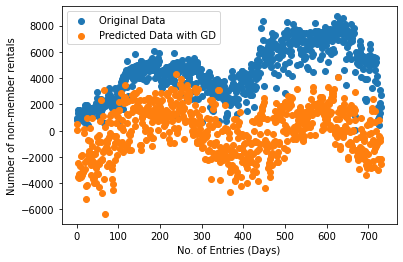

In [49]:
# Run normalization function
x_norm = normalize(x)


# Run the gradient descent function, but using the normalized data
m, b = gradient_descent(x_norm, y_norm, 1000, 0.0003)

# Get our prediction function: y = m_1*x_1 + m_2*x_2 + m_3*x_3 ... + b
y_pred = np.zeros(len(y))
for j in range(len(features)):
  y_pred += x_norm[:,j] * m[j]
y_pred += b

#y_pred = (y_pred*y_std) + y_mean

# compute cost
cost = mse_cost(y, y_pred)

# Plot scatter plot
print('found parameters m: ',m,' b: ',b)
print('cost: ',cost)

plt.scatter(df['instant'], y, label='Original Data')
plt.scatter(df['instant'], y_pred, label='Predicted Data with GD')
plt.xlabel('No. of Entries (Days)')
plt.ylabel('Number of non-member rentals')
plt.legend()
plt.show()

# In this case we see that the numpigeons is not a good parameter to try to predict using existing data